In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [0]:
#drive.mount('/content/drive')

In [5]:
cd "drive/My Drive/Colab Notebooks/dw_matrix/"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [9]:
!ls matrix_one
!mkdir data
!echo 'data' > .gitignore

Day3.ipynb
mkdir: cannot create directory ‘data’: File exists


In [0]:
!echo 'data' > .gitignore
!git add .gitignore

In [0]:
data=dw.load_dataset('datafiniti/mens-shoe-prices')

In [16]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [22]:
df=data.dataframes['7004_1']
#df.shape
df.sample(5)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [23]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [24]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [25]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
New with box                                              3
Wholesale Costume and Party Supplies - Walmart.com        2
New without tags                                          1
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
Name: prices_currency, dtype: int64

In [26]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
New without tags                                      0.000052
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
Name: prices_currency, dtype: float64

In [37]:
df_usd=df[df.prices_currency=='USD'].copy()
df_usd.shape

(18524, 48)

In [29]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

In [30]:
df_usd.prices_amountmin.astype(np.float)

0         39.89
1         51.99
2         40.02
3         50.31
4         46.26
5         55.99
6         41.12
7         46.19
8         21.40
9         45.23
10        45.00
11         7.99
12         9.99
13         9.99
14        19.99
15        25.00
16        15.99
17         9.99
19       299.99
20       124.95
21       124.95
22        60.02
23        54.22
24        44.99
25         5.99
26        86.98
27       149.00
28        63.00
29        13.99
30        23.99
          ...  
19355     17.99
19356     91.29
19357     91.29
19358    200.00
19359    114.75
19360    115.00
19361    121.50
19362     75.00
19363     25.99
19365     69.95
19367     86.01
19368    149.95
19369    174.00
19370     44.99
19371    170.00
19372    123.63
19373    123.63
19374    168.60
19375    129.59
19376     18.94
19377     18.30
19378     65.99
19379     58.99
19380     34.99
19381     94.00
19382     29.95
19383     64.95
19384     32.48
19385     31.48
19386     72.00
Name: prices_amountmin, 

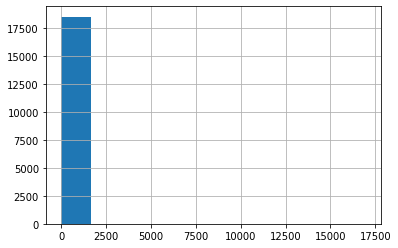

In [38]:
df_usd['prices_amountmin']=df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [34]:
np.percentile(df_usd['prices_amountmin'],99)

895.0

In [0]:
filter_max=np.percentile(df_usd['prices_amountmin'],99)
df_usd_filter=df_usd[df_usd['prices_amountmin']<filter_max]

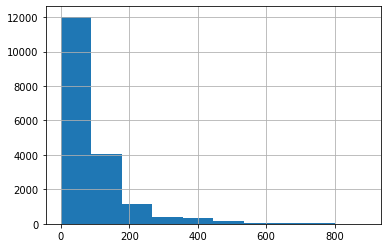

In [40]:
df_usd_filter['prices_amountmin'].hist()

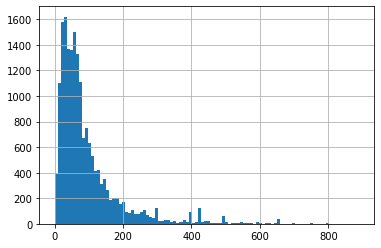

In [41]:
df_usd_filter['prices_amountmin'].hist(bins=100)

In [49]:
!pwd
!git add matrix_one/Day3.ipynb
!git commit -m "Read Men's Shoe Price dataset from data.world"

/content/drive/My Drive/Colab Notebooks/dw_matrix

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@bbc6468f7ebc.(none)')


In [0]:
  !git config --global user.email "msciwoj"
  !git config --global user.name "Mściwój"